# Import important Libraries

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid   # Unique identifier
import os
import time

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
#load model

Using cache found in C:\Users\arshd/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5 🚀 2022-8-13 Python-3.9.12 torch-1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


# Capture images to directory ( /data/images )

In [3]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['drowsy','awake','sunglasses','cellphone','headphones']
number_imgs = 100

In [4]:
# cap = cv2.VideoCapture(0)
# # Loop through labels
# for label in labels:
#     print('Collecting images for {}'.format(label))
#     time.sleep(5)
    
#     # Loop through image range
#     for img_num in range(number_imgs):
#         print('Collecting images for {}, image number {}'.format(label, img_num))
        
#         # Webcam feed
#         ret, frame = cap.read()
        
#         # Naming out image path
#         imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
#         # Writes out image to file 
#         cv2.imwrite(imgname, frame)
        
#         # Render to the screen
#         cv2.imshow('Image Collection', frame)
        
#         # 2 second delay between captures
#         time.sleep(2)
        
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
# cap.release()
# cv2.destroyAllWindows()

In [5]:
# to check the files have been saved properly
# for label in labels:
#     print('Collecting images for {}'.format(label))
#     for img_num in range(number_imgs):
#         print('Collecting images for {}, image number {}'.format(label, img_num))
#         imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
#         print(imgname) 

# Download LabelImg and install

In [6]:
# !git clone https://github.com/tzutalin/labelImg
# !dir

In [7]:
# !pip install pyqt5 lxml --upgrade
# !cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [8]:
# !dir

# Training using pytorch (same in colab)

In [9]:
#!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

# Load custom model trained and stored int yolov5 runs train

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp9/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\arshd/.cache\torch\hub\master.zip
YOLOv5 🚀 2022-8-13 Python-3.9.12 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7066762 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


# Test with images (video takes time due to no GPU in laptop)

image 1/1: 480x640 1 awake
Speed: 38.9ms pre-process, 489.5ms inference, 5.0ms NMS per image at shape (1, 3, 480, 640)


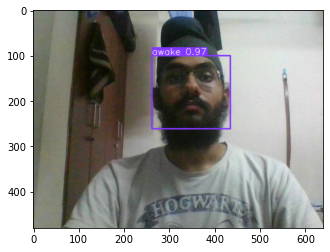

In [11]:
img = os.path.join('data/images/awake.00ddadf9-084d-11ed-9216-a4fc773f961c.jpg')
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.imsave('tst/'+str(uuid.uuid1())+'.jpg',np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture('video.mp4')

q=1240
for i in range(q):
    ret, frame = cap.read()
    imgname = os.path.join('tst/'+str(i)+'.jpg')
    cv2.imwrite(imgname, frame)    
cap.release()
cv2.destroyAllWindows()

for i in range(q):
    print("Processing : "+str(i))
    img = os.path.join('tst/'+str(i)+'.jpg')
    results=model(img)
    plt.imsave('demo/'+str(i)+'.jpg',np.squeeze(results.render()))

In [ ]:
img_array = []
for i in range(0,q,2):
    print("Processing : "+str(i))
    img = cv2.imread('demo/'+str(i)+'.jpg')
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()